## Normalization

In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load dataset
dataset = pd.read_csv('loan.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [13]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# fill null values in loan amount
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace = True)

In [15]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


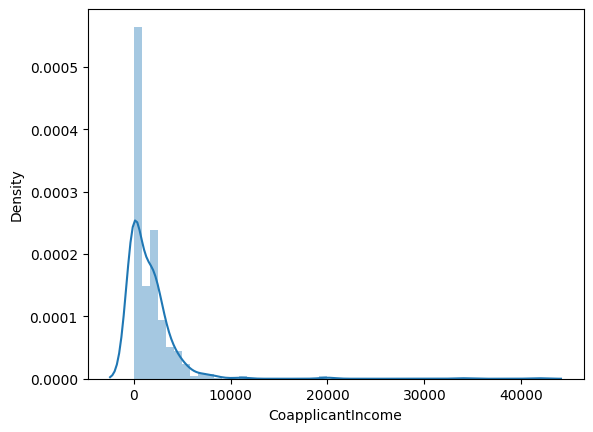

In [14]:
# now first check the nature of dataset
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# fit dataset
norm =  MinMaxScaler()
norm.fit(dataset[['CoapplicantIncome']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [25]:
# transform dataset
dataset['CoapplicantIncome_norm'] = pd.DataFrame(norm.transform(dataset[['CoapplicantIncome']]))

In [26]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_norm
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.000000


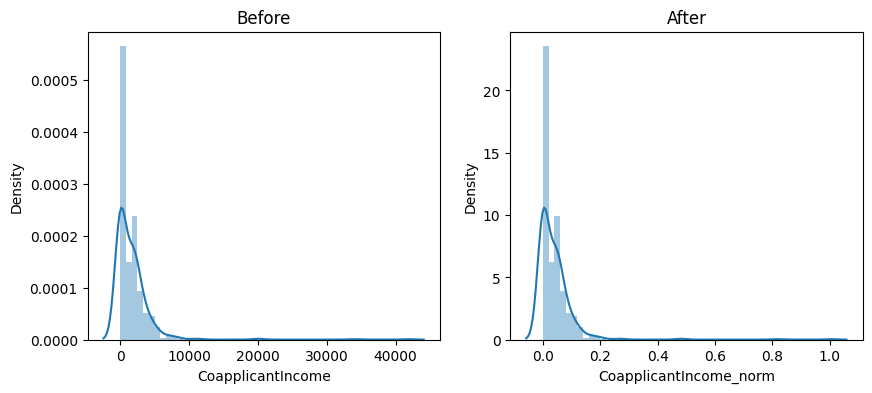

In [31]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(dataset['CoapplicantIncome_norm'])
plt.show()